In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

D1 = pd.read_csv("Data1.csv")
D2 = pd.read_csv("Data2.csv")


In [2]:
D1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [19]:
D1.shape

(5000, 8)

In [3]:
D2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [20]:
D2.shape

(5000, 7)

In [4]:
D1.shape , D2.shape   # the shape of Data1 and Data2

((5000, 8), (5000, 7))

In [5]:
D1.columns.values  , D2.columns.values   # columns names of Data1 and Data2

(array(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode',
        'HiddenScore', 'MonthlyAverageSpend', 'Level'], dtype=object),
 array(['ID', 'Mortgage', 'Security', 'FixedDepositAccount',
        'InternetBanking', 'CreditCard', 'LoanOnCard'], dtype=object))

In [6]:
D1.dtypes  , D2.dtypes

(ID                       int64
 Age                      int64
 CustomerSince            int64
 HighestSpend             int64
 ZipCode                  int64
 HiddenScore              int64
 MonthlyAverageSpend    float64
 Level                    int64
 dtype: object,
 ID                       int64
 Mortgage                 int64
 Security                 int64
 FixedDepositAccount      int64
 InternetBanking          int64
 CreditCard               int64
 LoanOnCard             float64
 dtype: object)

In [7]:
D = D1.merge(D2,on='ID')  # merged two datas D1 and D2 with future ID 

In [8]:
D

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [9]:
D = D.astype({"CreditCard":object,"InternetBanking":object,"FixedDepositAccount":object,"Security":object,"Level":object,"HiddenScore":object})

In [10]:
D.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

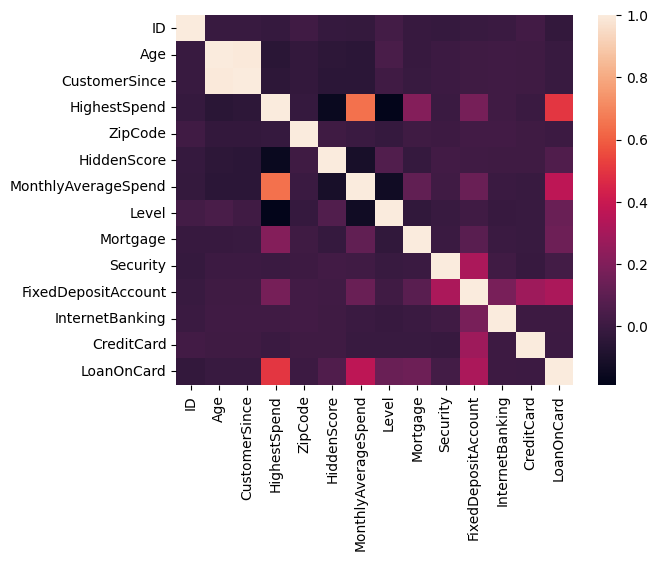

In [11]:
sns.heatmap(D.corr())
plt.show()

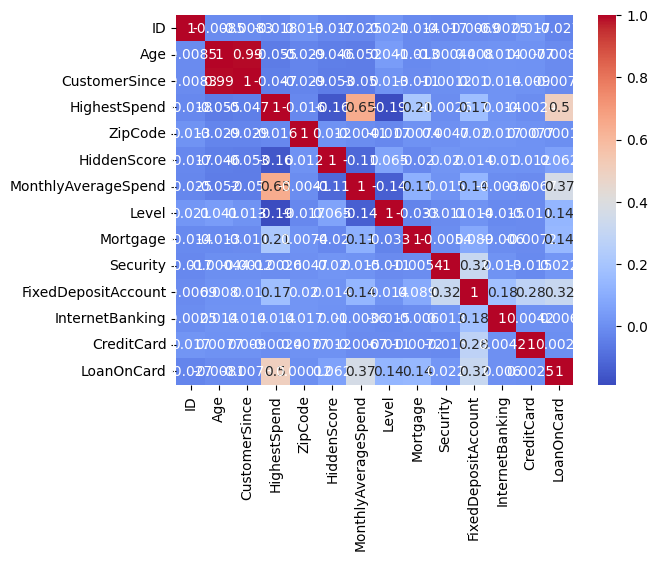

In [12]:
figsize=(20,20)
sns.heatmap(D.corr(),cmap='coolwarm',annot=True)
plt.show()

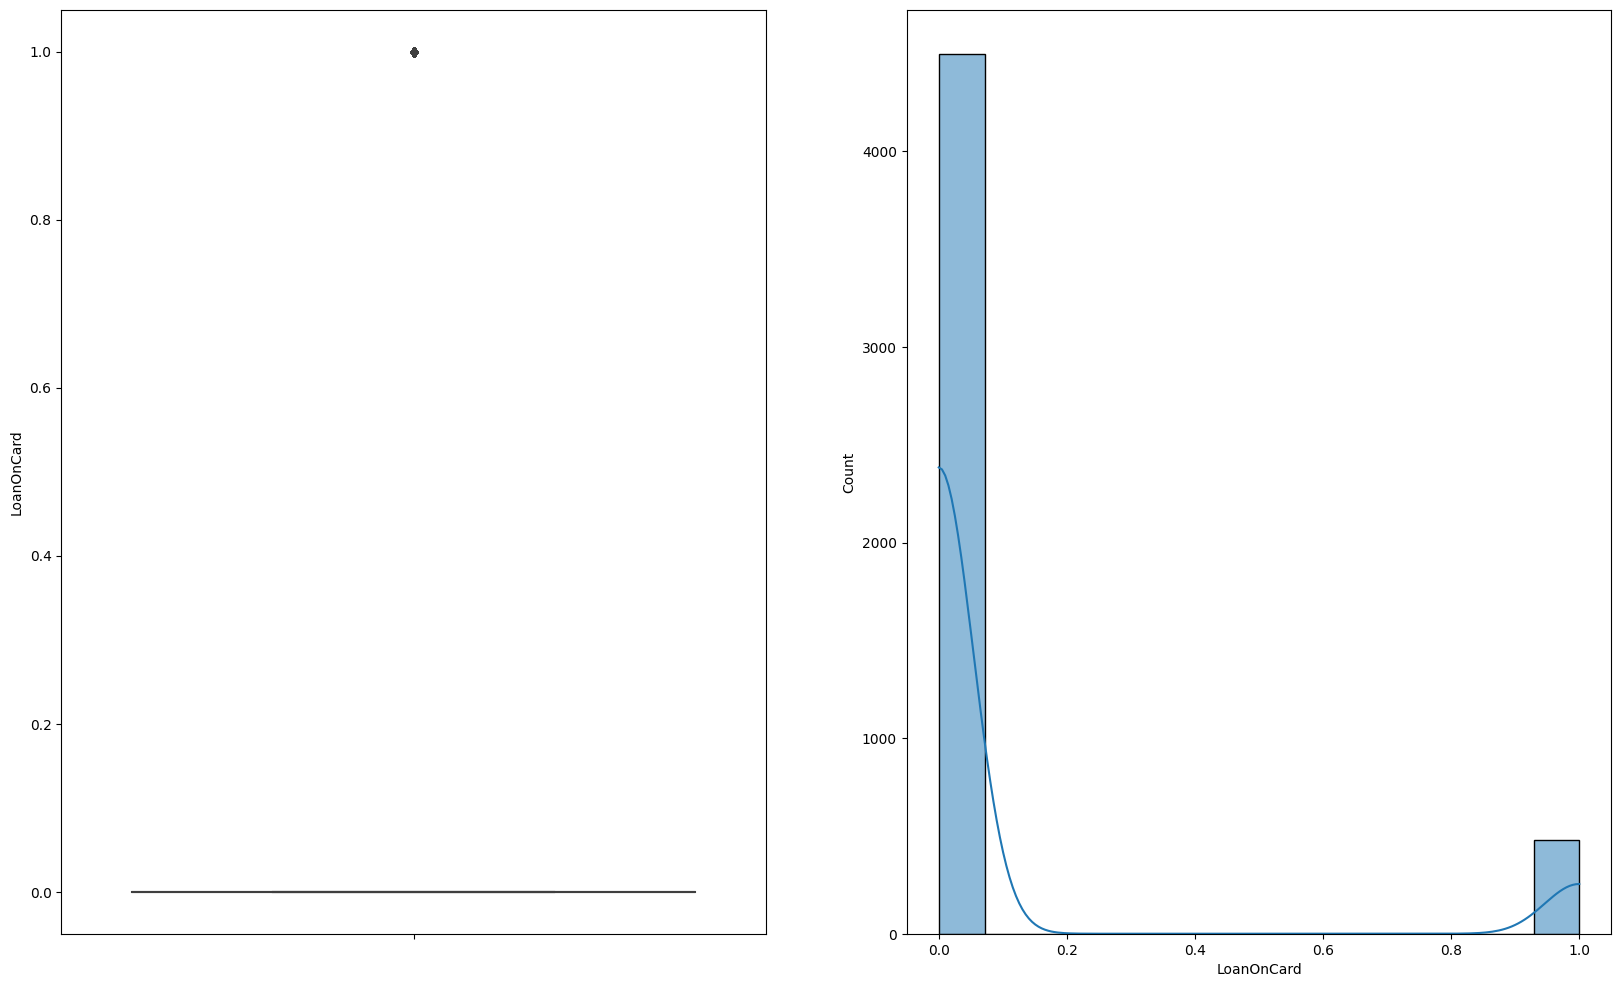

In [13]:
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
sns.boxplot(y=D['LoanOnCard'])
plt.subplot(1,2,2)
sns.histplot(D['LoanOnCard'], kde=True )
plt.show()              

In [14]:
Missing_percent=D.isnull().sum()*100/len(D)
Missing_percent

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [15]:
D.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


The above one showing that for ID(1,2,3,4,5) the LoanOnCard is having unexpected values.


<Axes: xlabel='ID', ylabel='Age'>

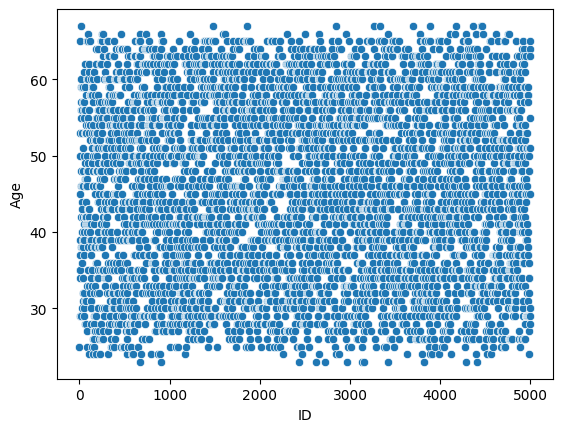

In [16]:
sns.scatterplot(x="ID" , y = "Age" , data = D)

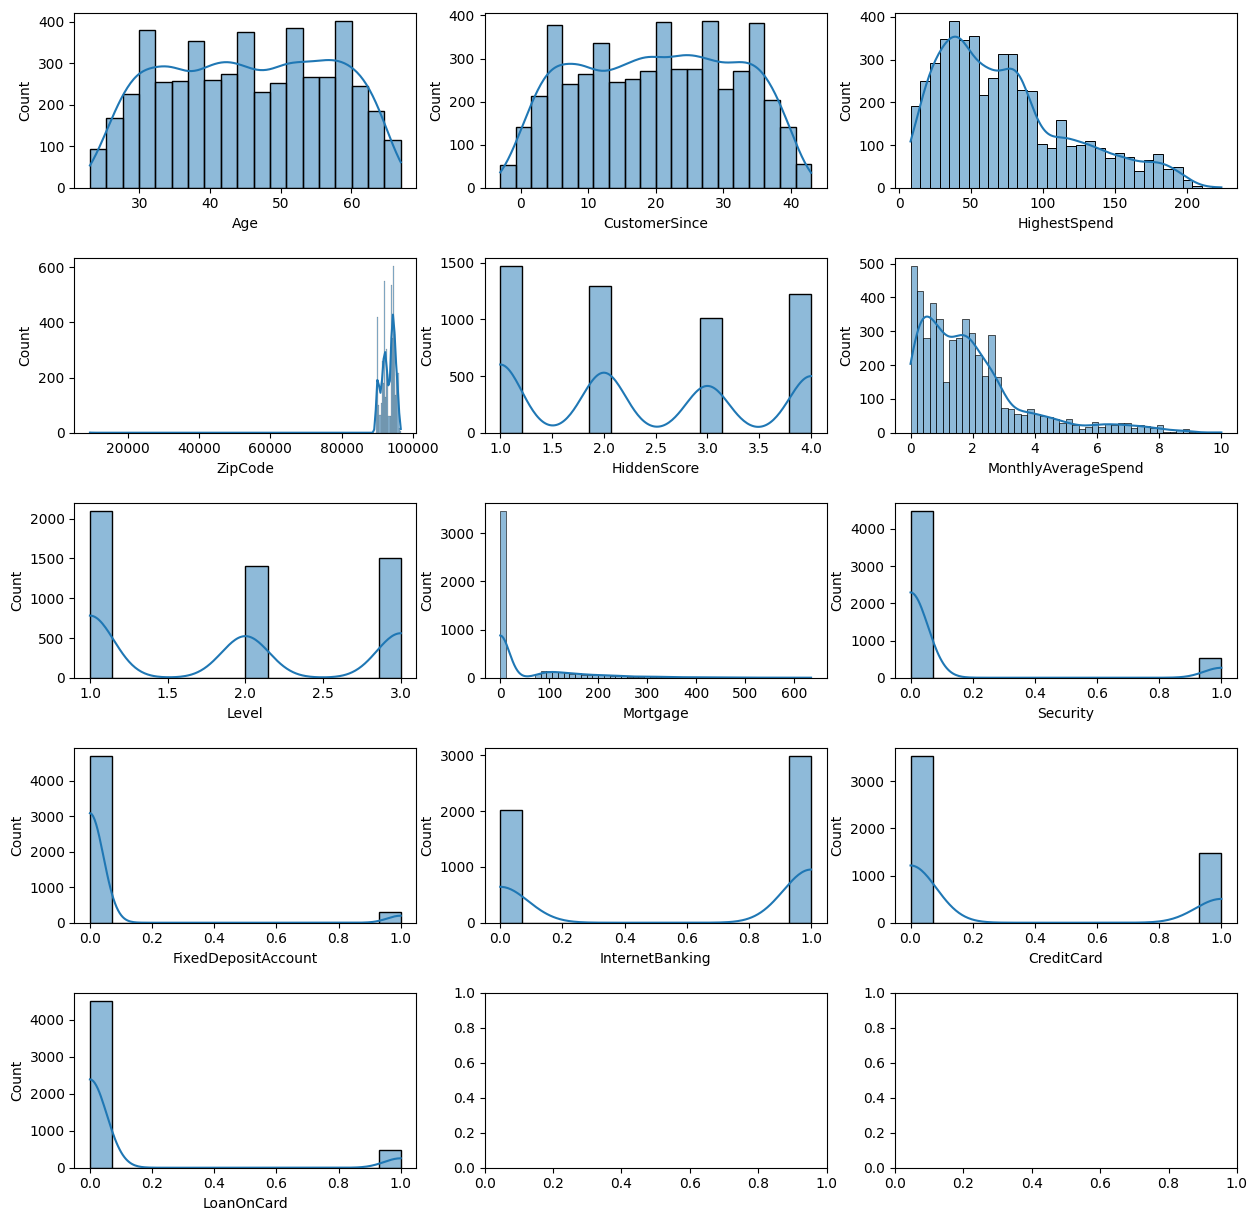

In [17]:
fig,axes = plt.subplots(5,3,figsize=(15,15))
a,b=0,0
for col in D.columns:
    if col!='' and col!='ID':
        sns.histplot( ax=axes[a,b] , data=D , x=col ,kde= True )
        plt.subplots_adjust(hspace=0.4)  # to get a gap between each row of ploting
#         axes[a,b].set_title(f'{col}')
        b+=1
        if b>=3:
            a+=1
            b=0

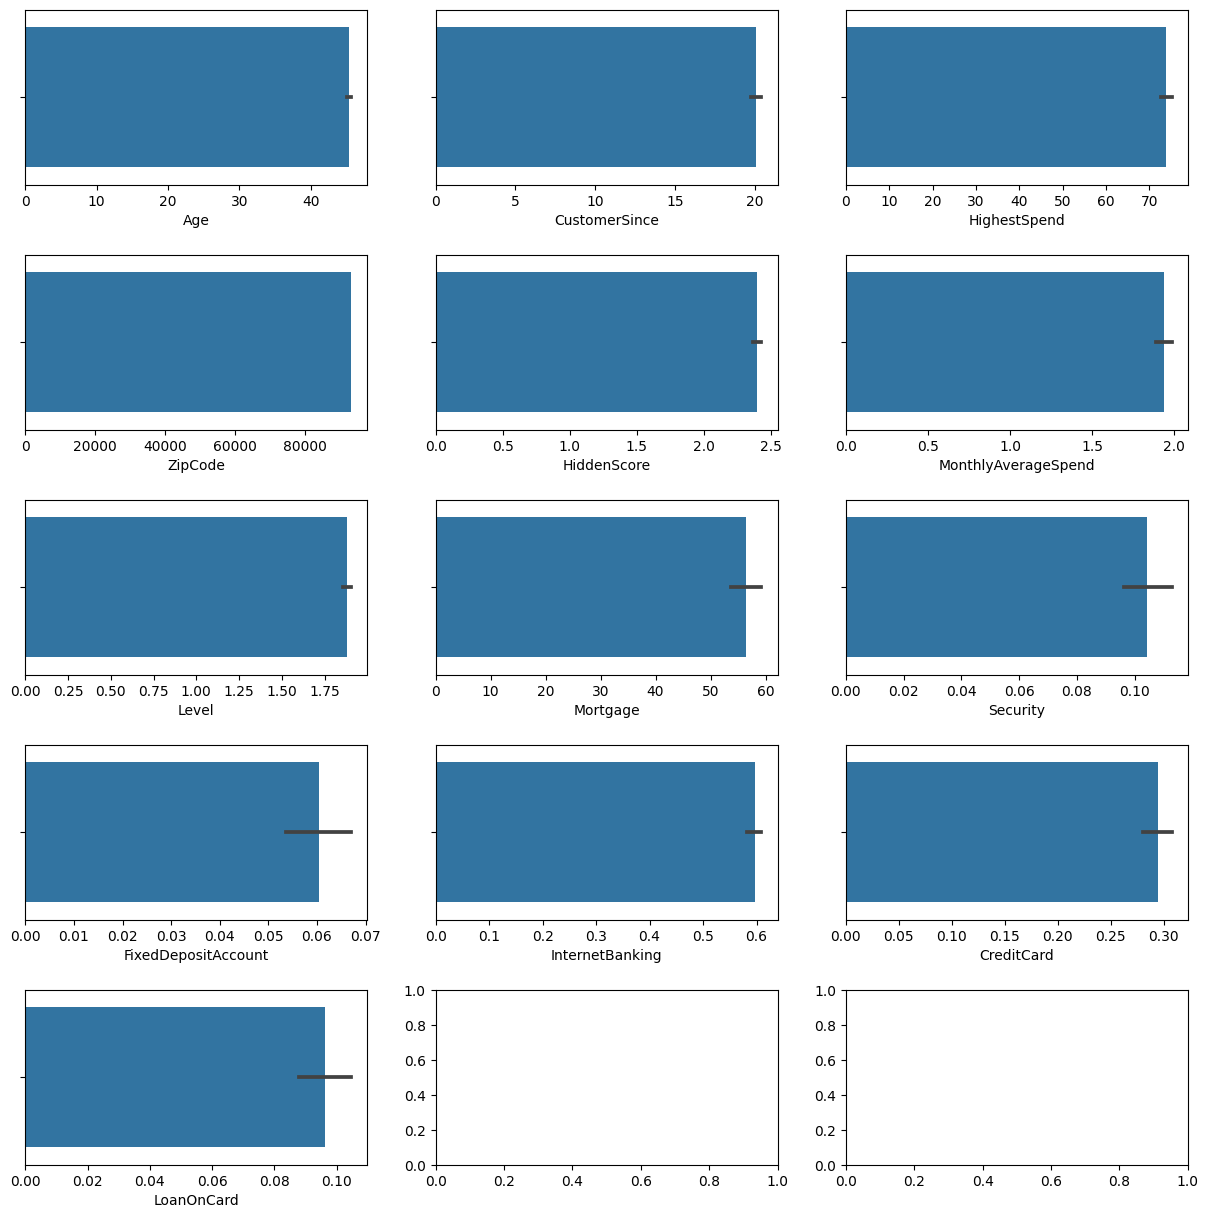

In [18]:
fig,axes = plt.subplots(5,3,figsize=(15,15))
a,b=0,0
for col in D.columns:
    if col!='' and col!='ID':
        sns.barplot( ax=axes[a,b] , data=D , x=col )
        plt.subplots_adjust(hspace=0.4)  # to get a gap between each row of ploting
#         axes[a,b].set_title(f'{col}')
        b+=1
        if b>=3:
            a+=1
            b=0

In [22]:
D

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [23]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


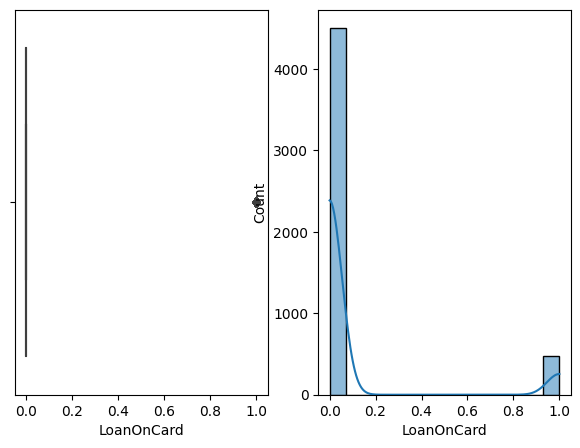

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(data=D,x=D['LoanOnCard'])
plt.subplot(1,4,2)
sns.histplot(data=D,x=D['LoanOnCard'],kde=True)
plt.show()

We can clearly see that thre are many people who didn't take any loans on card and there are only few people who took the loans on the card like we can say that there are 4500 people who didn't take any loans and there are only 500 peple who took loans on card.

In [25]:
missing_percentage = (D.isnull().sum()/len(D)) * 100
missing_percentage

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [26]:
missing_info = pd.DataFrame({
    'Column':missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

missing_info = missing_info.sort_values(by='Missing Percentage',ascending=False)
print(missing_info)

                 Column  Missing Percentage
13           LoanOnCard                 0.4
0                    ID                 0.0
1                   Age                 0.0
2         CustomerSince                 0.0
3          HighestSpend                 0.0
4               ZipCode                 0.0
5           HiddenScore                 0.0
6   MonthlyAverageSpend                 0.0
7                 Level                 0.0
8              Mortgage                 0.0
9              Security                 0.0
10  FixedDepositAccount                 0.0
11      InternetBanking                 0.0
12           CreditCard                 0.0


In [27]:
D.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

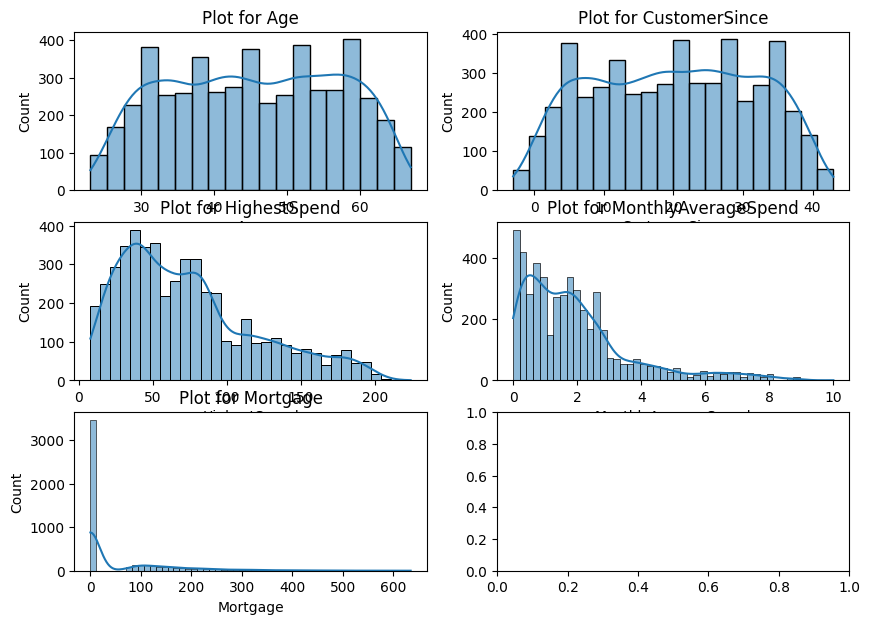

In [28]:
def HistPlot(data):
    data=D
    fig,axes = plt.subplots(3,2,figsize=(10,7))
    a,b = 0,0
    features = ['Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend', 'Mortgage']

    for cols in D.columns:
        if cols in features:
            sns.histplot(D[cols],kde=True,ax=axes[a,b])
            axes[a,b].set_title(f'Plot for {cols}')
            b+=1
            if b>=2:
                b=0
                a+=1
                if a >= 3:
                    break 
HistPlot(D)
plt.show()

'Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend', 'Mortgage' -- are all continuous numerical features where we can plot the histograms for these features and can determine their central tendency and spread of these variables.

We can see that plots for HighestSpend and MonthlyAverageSpend are both right-skewed, and the both are getting gradually decreased.And we can see that there are no mortgages done and very few mortgages can be seen.

Seems like the distribution is normal for the both the features Age and CustomerSince.

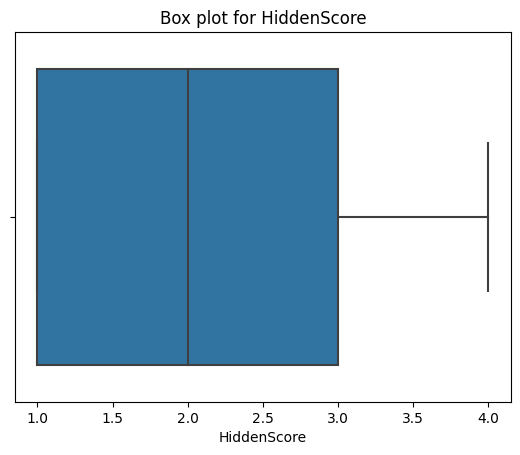

In [29]:
sns.boxplot(x=D['HiddenScore'])
plt.title('Box plot for HiddenScore')
plt.show()

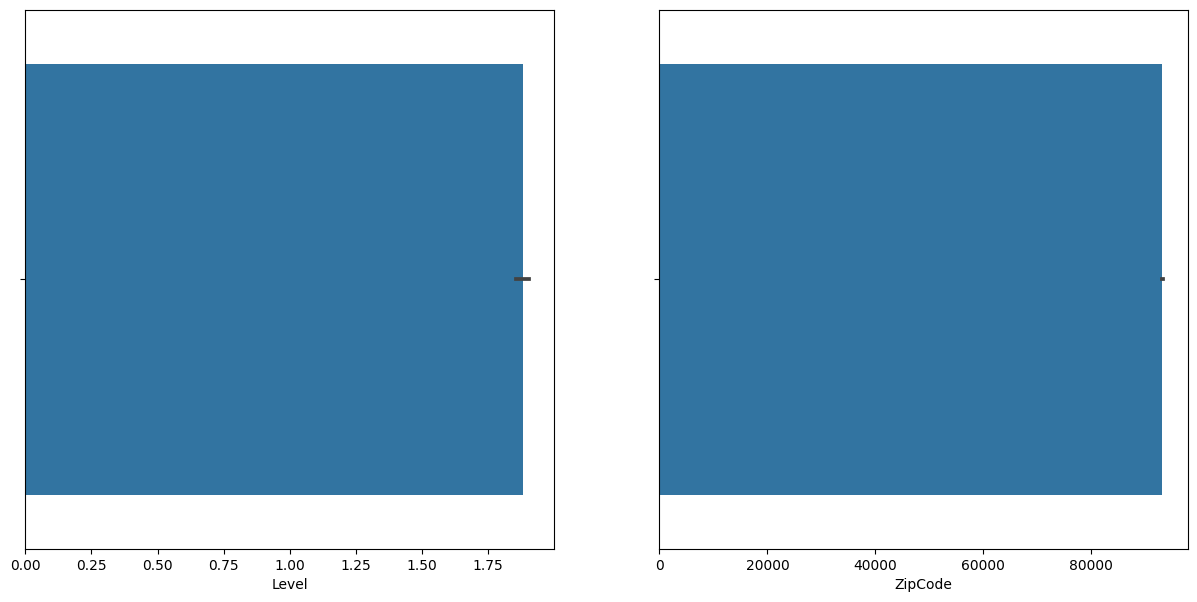

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data=D,x=D['Level'])
plt.subplot(1,2,2)
sns.barplot(data=D,x=D['ZipCode'])
plt.show()

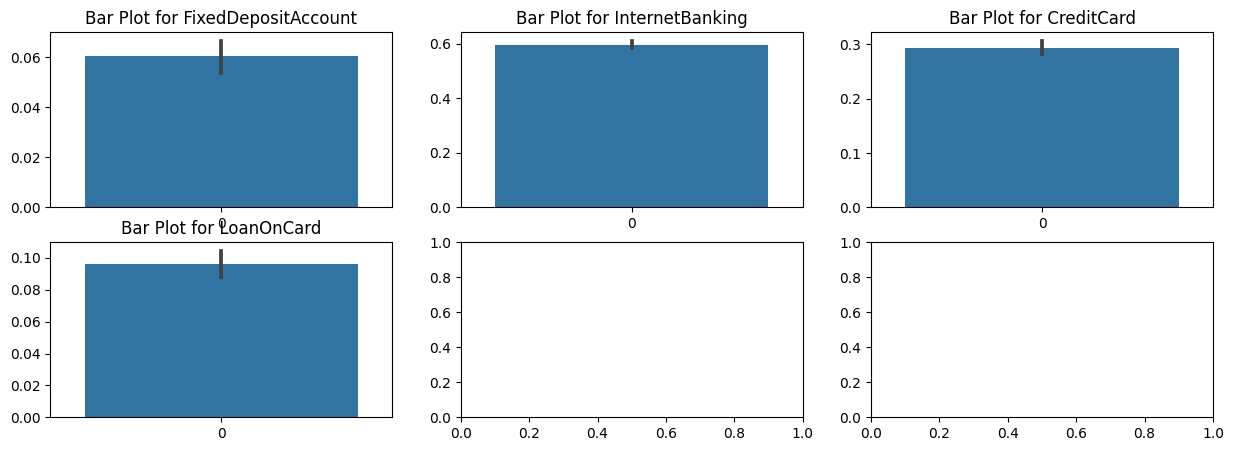

In [34]:
def Bar(data):
    data = D
    figure, axes = plt.subplots(2,3,figsize=(15,5))
    a,b = 0,0
    features = ['FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
    for cols in D.columns:
        if cols in features:
            sns.barplot(D[cols],ax=axes[a,b])
            axes[a,b].set_title(f'Bar Plot for {cols}')
            b+=1
            if b>=3:
                b=0
                a+=1
                if a >= 2:
                    break 

Bar(D)                    
plt.show()

C:\Users\Msc 1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


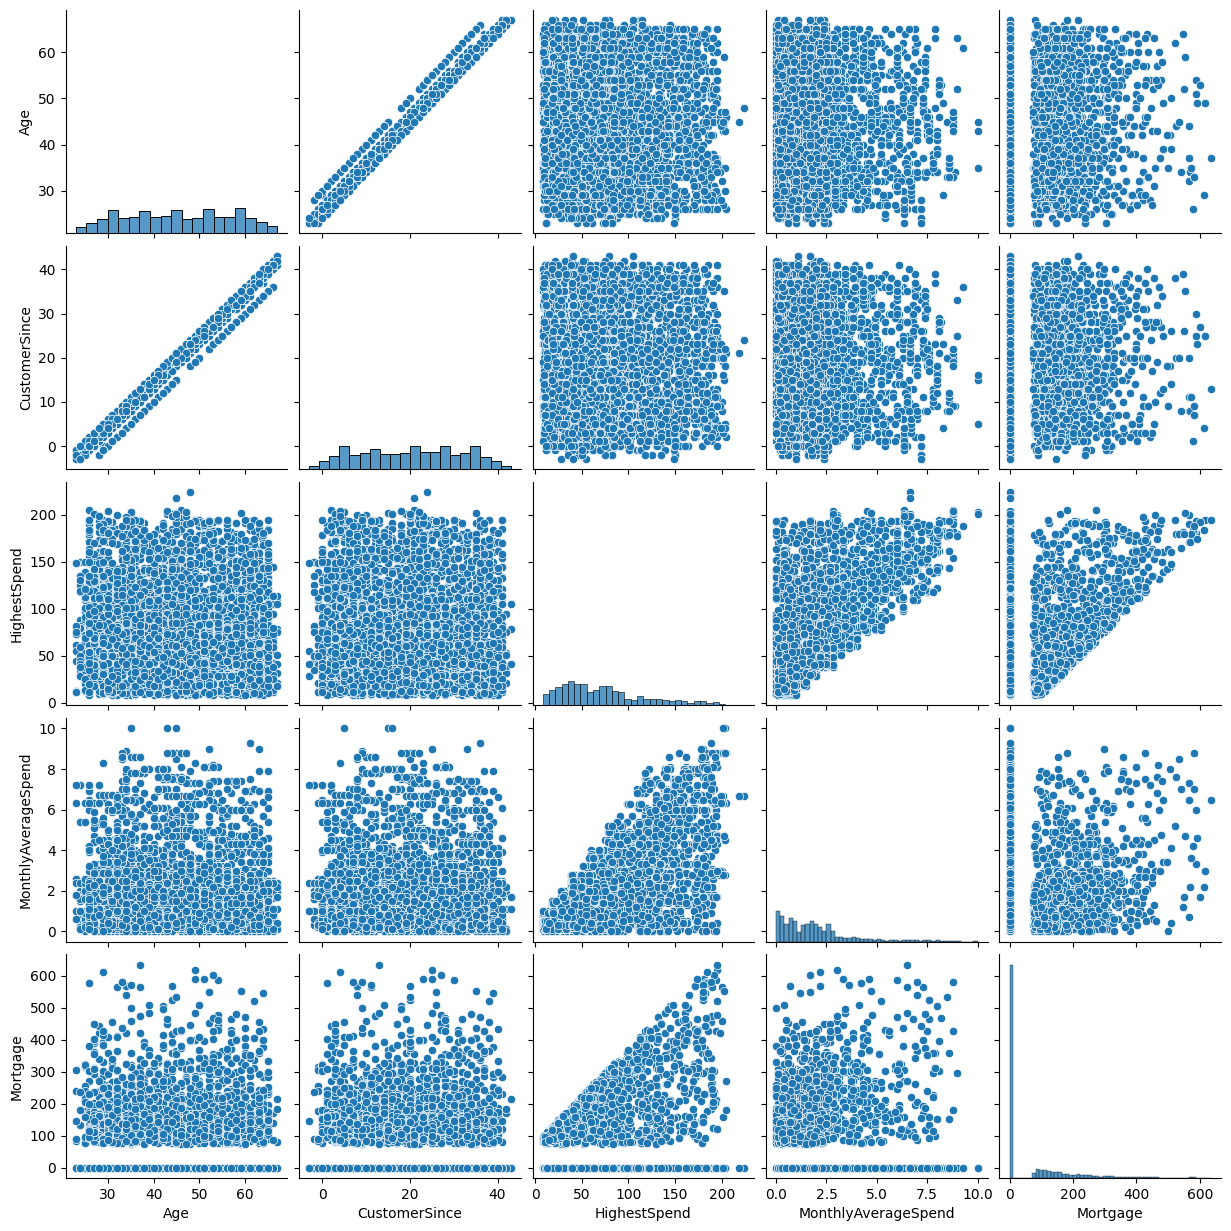

In [36]:
features = ['Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend', 'Mortgage']
df_subset = D[features]
sns.pairplot(df_subset)
plt.show()

In [39]:
def hist_plot(dataframe, figsize=(15,15)):
    features = D.select_dtypes(include=['number'])
    num_features = len(features.columns)
    num_cols = int(math.sqrt(num_features))
    num_rows = math.ceil(num_features / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.ravel()
    for i, feature in enumerate(features.columns):
        axes[i].hist(D[feature], bins=20, alpha=0.7, color='pink', edgecolor='black')
        axes[i].set_title(f'Histogram of {feature}')
    for i in range(num_features, num_cols * num_rows):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()


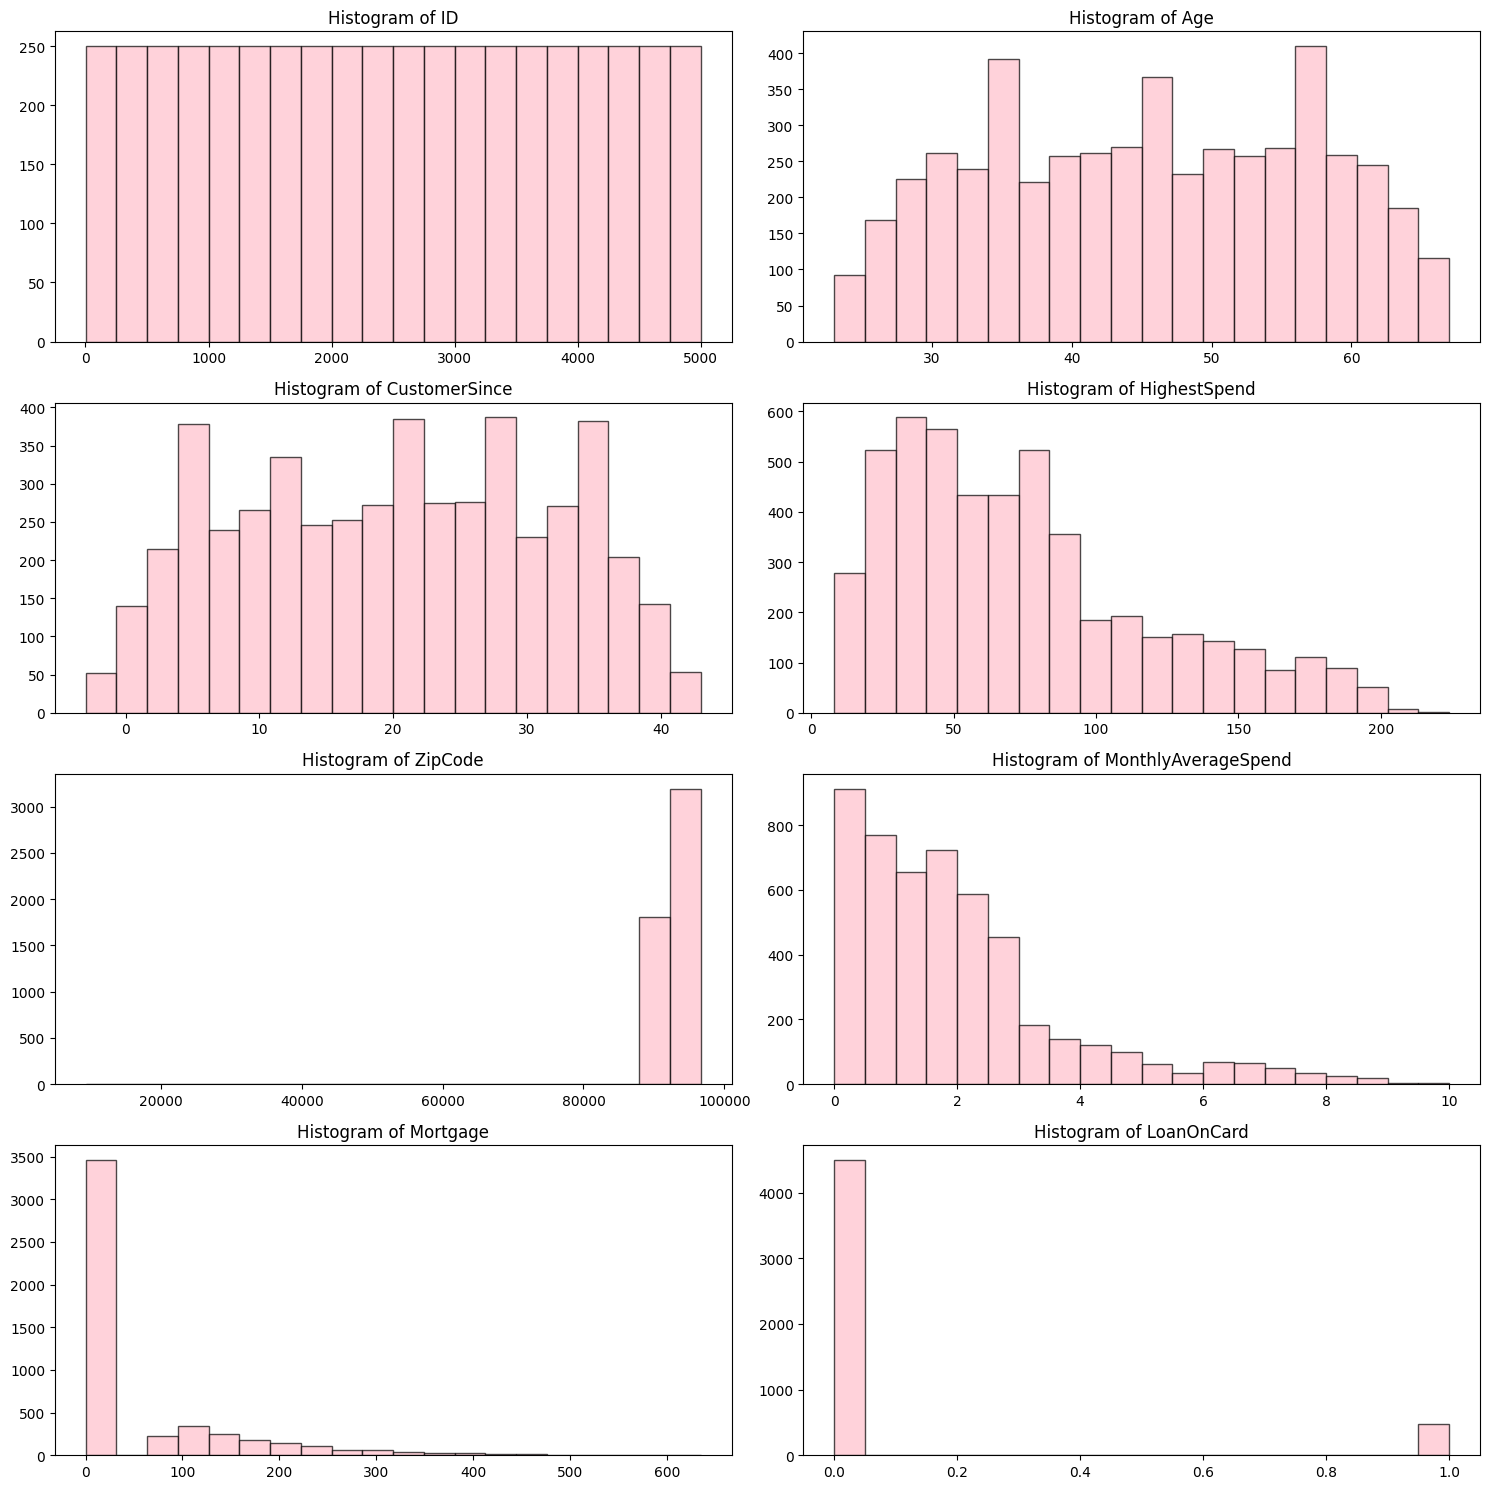

In [42]:
hist_plot(D)    